CODSOFT
Task-4 : Sales Prediction Using Python

In [5]:
# importing modules
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
df.shape

(200, 4)

In [8]:
df.columns.values.tolist()

['TV', 'Radio', 'Newspaper', 'Sales']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:


df.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [11]:

df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

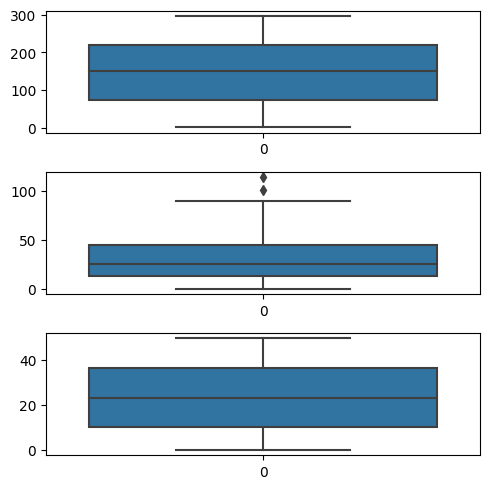

In [13]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

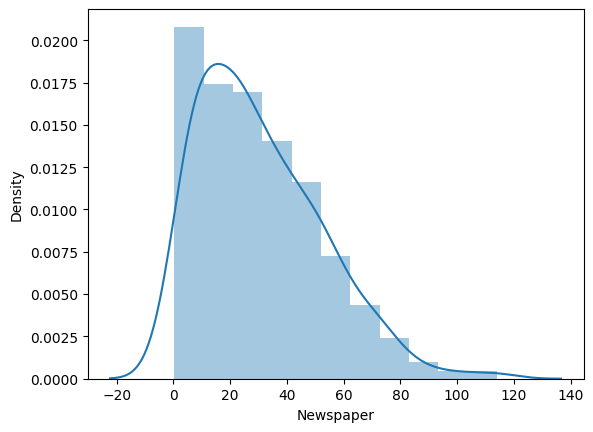

In [14]:
sns.distplot(df['Newspaper'])

In [15]:
igr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [16]:
lower_bridge = df["Newspaper"].quantile(0.25) - (igr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) + (igr*1.5)
print(lower_bridge)
print(upper_bridge)
     

-35.775000000000006
93.625


In [17]:
data = df.copy()
     

In [18]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

<AxesSubplot:>

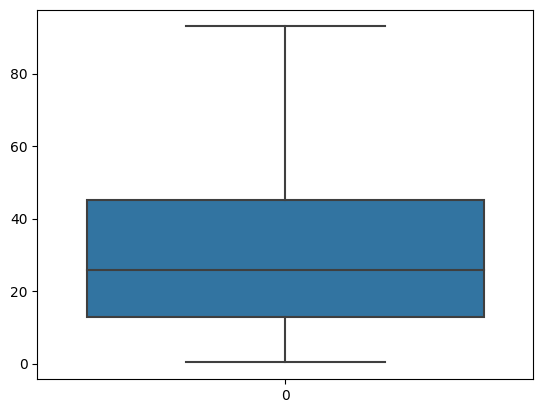

In [19]:
sns.boxplot(data[ 'Newspaper'])

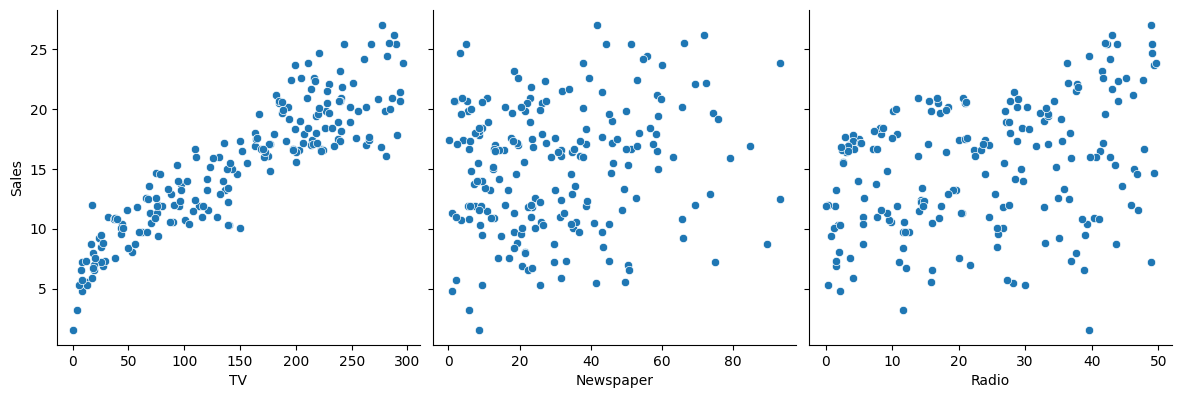

In [20]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
      y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

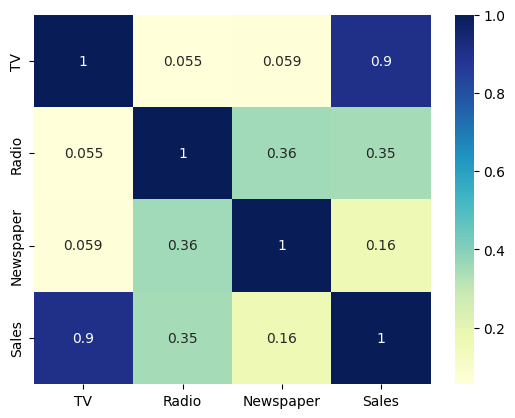

In [21]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [22]:
important_features = list(df.corr()['Sales'][(df.corr()[ 'Sales' ]>+0.5)|(df.corr()[ 'Sales' ]<-0.5)].index)

In [23]:
print(important_features)

['TV', 'Sales']


In [24]:
X = data['TV']
Y = data['Sales']

In [25]:
X = X.values.reshape(-1,1)

In [26]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [27]:
Y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [28]:
print(X.shape,Y.shape)

(200, 1) (200,)


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.33)

In [30]:
print(X_train.shape,Y_train.shape)

(134, 1) (134,)


In [31]:
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [32]:
knn = KNeighborsRegressor().fit(X_train, Y_train)
knn

KNeighborsRegressor()

In [33]:
knn_train_pred = knn.predict(X_train)

In [34]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE", "Variance"])

In [35]:
knn_test_pred  = knn.predict(X_test)

In [36]:
print(knn_train_pred, knn_test_pred)

[ 8.14 19.78  9.98 12.44 21.24 12.48 12.2  17.92  6.06  5.26 21.96 14.88
 10.1   6.84 19.44 12.66 12.78 18.22 19.66 22.62 12.66 12.66  8.28 12.12
 19.   14.06  5.96 17.92 18.68 22.96 19.76 10.68 10.1  17.88 20.56 19.44
 12.82  9.6  22.78 18.    6.84 13.1  13.58 17.84 12.84 19.6   5.96 19.66
 17.84  6.84 12.84 18.34 12.82 14.88 18.9  19.7  19.28 21.02 19.6  21.24
 20.28 21.02 12.38 19.66 14.06  8.64 14.1  11.44 11.86 19.7   4.44 12.66
 22.36 22.36 18.36 15.26 19.92  8.64 12.38 19.86 13.1  17.92 19.32 12.96
 19.26 19.7  19.2  11.86 12.14  8.28 10.48 12.48 17.4  18.34  5.96 19.6
 19.36 12.58 12.66 19.16 13.1   9.6  12.38 13.1  19.78  6.84  6.1  18.36
  9.6  20.56 22.36  5.96 16.14 21.02 16.14 14.46 18.    4.44 12.44 12.38
 17.04 14.88  5.96 20.38 17.62  6.84 17.92 11.44 12.84 12.44 13.1  20.2
  9.68  8.28] [22.62 22.36  6.84 10.1  12.48 13.08 12.38 11.44 14.86 19.16 19.92 19.44
 18.9  18.9  20.56 14.88 17.84 19.7  11.2  20.2  12.84 17.04  6.1  19.28
 12.38 19.76 18.68  9.68  9.82 17.84 17

In [37]:
r2 = r2_score(Y_test,knn_test_pred)
r2_train = r2_score(Y_train, knn_train_pred)
rmse = np.sqrt(mean_squared_error(Y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse),

R2: 0.8322876589451061
RMSE: 2.0337098508823117


(None,)

In [38]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.842222,0.832288,2.03371,0.009934


In [39]:
import statsmodels.api as sm

In [40]:
X_train_constant = sm.add_constant(X_train)

In [41]:
model = sm.OLS(Y_train, X_train_constant).fit()

In [42]:
model.params

const    6.675436
x1       0.057340
dtype: float64

In [43]:
print(model.summary ())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     529.3
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           5.00e-48
Time:                        11:54:43   Log-Likelihood:                -307.73
No. Observations:                 134   AIC:                             619.5
Df Residuals:                     132   BIC:                             625.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6754      0.410     16.267      0.0

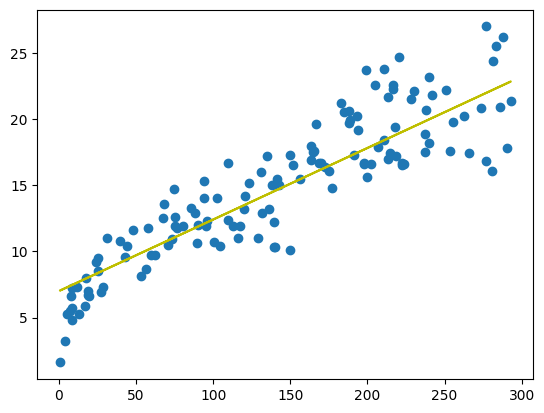

In [44]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()

In [45]:
y_train_pred = model.predict(X_train_constant)
res = (Y_train - y_train_pred)
res

12     1.159866
52     3.516136
60    -1.643139
79    -2.326904
181   -2.004278
         ...   
164   -1.495712
77     0.615065
11    -1.586385
135    2.155030
44     0.385324
Name: Sales, Length: 134, dtype: float64

In [46]:
y_train_pred

array([ 8.04013373, 19.08386355,  9.74313879, 13.32690366, 19.20427805,
       12.97139419, 14.58265487, 16.17097947,  7.34631685,  6.98507335,
       22.77084085, 15.36248211,  9.14106629,  7.74769851, 21.32013283,
       14.86935606, 13.14914893, 18.43018484, 18.76275822, 22.93712754,
       14.67439926, 14.72027145,  8.25229261, 10.88420953, 21.90500326,
       14.19274126,  7.17429613, 16.05056497, 19.74901031, 23.07474411,
       18.7570242 ,  8.94037546,  9.22707665, 16.23978775, 20.44282719,
       21.22838845, 11.73857907,  9.89795743, 22.81097902, 17.78224015,
        7.75343254, 12.07688648, 14.48517647, 18.08040939, 12.16289683,
       17.47833689,  7.12268992, 18.91184284, 18.1320156 ,  7.66168815,
       12.67322495, 19.42790498, 11.81885541, 15.25926968, 19.30749048,
       20.28800855, 18.28683425, 22.36945919, 17.44966677, 19.15840586,
       20.53457157, 22.5414799 , 10.95875184, 18.91757686, 14.2271454 ,
        8.31536687, 14.42783623, 10.59750834, 12.43239595, 20.33

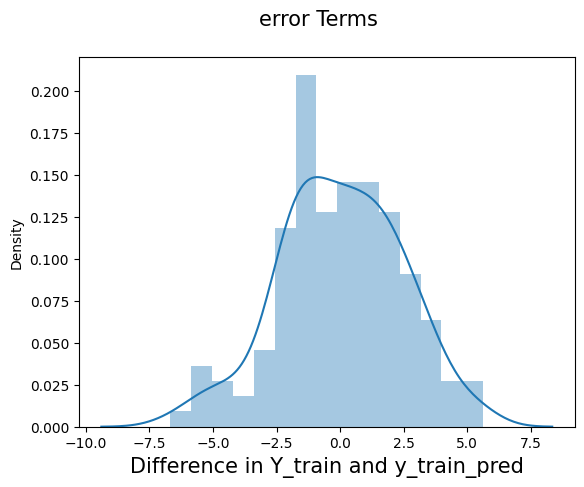

In [47]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('error Terms', fontsize = 15)
plt.xlabel( 'Difference in Y_train and y_train_pred', fontsize = 15)
plt.show()

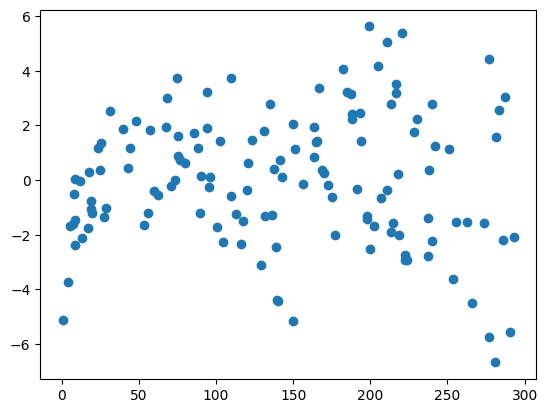

In [48]:
plt.scatter(X_train, res)
plt.show()

In [49]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)

In [50]:
y_pred

array([22.97726571, 23.67108259,  7.79930473,  9.14680032, 13.0230004 ,
       12.83377762, 11.05049622, 10.51149798, 14.37623002, 21.88206717,
       20.91875117, 21.65844024, 19.27882036, 19.31895853, 20.62058193,
       15.12165311, 18.09187744, 20.396955  , 10.46562579, 19.02652332,
       12.26610926, 16.82465818,  7.4323272 , 17.87971856, 11.05623024,
       18.69394994, 19.76621238,  9.54244796,  8.86583315, 18.1320156 ,
       16.75011587, 19.70313812,  8.10894201, 20.94168726, 14.66293121,
       11.67550481, 13.61360485, 10.63191248,  8.79129084, 19.98410529,
       22.74217073, 12.24890719, 16.49781882, 19.62286179, 10.99315598,
       10.64338053, 21.97954557, 20.44282719,  8.8543651 ,  7.64448608,
       20.12172186, 19.19854403, 17.27764606, 23.28690299, 19.83502067,
        7.66168815, 13.88310397, 11.15944267,  8.21215444, 23.51052992,
       20.42562512, 18.37857863, 21.75018462,  9.2385447 , 18.53339727,
       17.04255108])

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [52]:
np.sqrt(mean_squared_error(Y_test,y_pred))

2.0366501866907325

In [53]:
r2 = r2_score(Y_test,y_pred)
r2

0.8318023516771238

In [54]:
r2*100

83.18023516771238

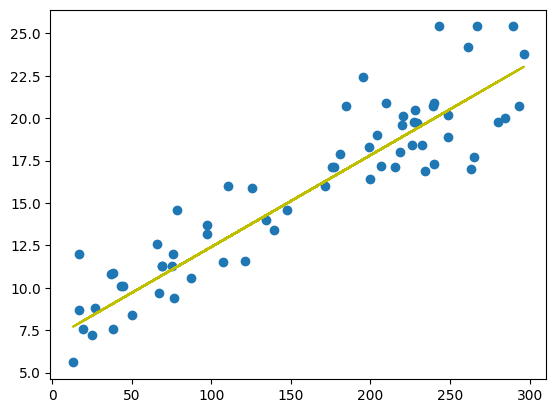

In [55]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, 6.9955 + 0.0541 * X_test, 'y')
plt.show()